# Credit Card Fraud Detection Challenge at Silverleaf National Bank

## The Situation
It's 9:15 AM at Silverleaf National Bank's headquarters. You've just left an emergency meeting where the Head of Security revealed alarming statistics: a 47% increase in credit card fraud cases over the last quarter, resulting in $2.3 million in losses. The CEO has given your team 48 hours to develop a solution.

## Your Mission
As the lead data scientist, you must develop a machine learning model to detect fraudulent transactions in real-time. You have access to a historical dataset of 100,000 transactions, each labeled as fraudulent or legitimate.

## Time Allocation (2 hours total):
- EDA & Visualization: 40 minutes
- Data Preprocessing: 20 minutes
- Model Building & Evaluation: 40 minutes
- Making & Saving Predictions: 20 minutes

## Grading:
- EDA (25 points)
- Data Preprocessing (25 points)
- Model Building & Evaluation (25 points)
- Test Predictions (25 points)
- Bonus Points (10 points)

Let's save the bank!

In [17]:
%pip install pandas numpy scikit-learn matplotlib seaborn plotly nbformat

In [18]:
import os
import requests

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Set random seed for reproducibility
np.random.seed(42)
# Configure plots for better visibility
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 12

thePath = './'  # Adjust this path as necessary
theLinkTrain = "https://dse200.dev/Day3/fraud_training.csv"
theFileTrain = "fraud_training.csv"

theLinkTest = "https://dse200.dev/Day3/fraud_test.csv"
theFileTest = "fraud_test.csv"


if not os.path.exists(thePath + theFileTrain):
    r = requests.get(theLinkTrain)
    with open(thePath + theFileTrain, 'wb') as f:
        f.write(r.content)

if not os.path.exists(thePath + theFileTest):
    r = requests.get(theLinkTest)
    with open(thePath + theFileTest, 'wb') as f:
        f.write(r.content)


# Part 1: Exploratory Data Analysis (EDA) - 25 points

Load the training data and create the following visualizations:

1. Required Visualizations (15 points):
   - Chart showing fraud vs. non-fraud distribution
   - Box plot comparing transaction amounts for fraudulent vs. non-fraudulent cases
   - Heatmap showing correlations between numeric features

2. Choose TWO from these options (10 points):
   - Time series plot of fraud occurrences
   - Geographic distribution of fraud cases
   - Transaction type analysis
   - Merchant risk analysis

For each visualization, write 2-3 sentences explaining your insights.

In [19]:
# Load the data
df_train = pd.read_csv(thePath + theFileTrain)

# Display basic information about the dataset
print("Dataset Shape:", df_train.shape)
print("\nDataset Info:")
df_train.info()
print("\nMissing Values:")
print(df_train.isnull().sum())
df_train.head(5)

Dataset Shape: (75000, 7)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    75000 non-null  int64  
 1   TransactionDate  75000 non-null  object 
 2   Amount           75000 non-null  float64
 3   MerchantID       75000 non-null  int64  
 4   TransactionType  75000 non-null  object 
 5   Location         75000 non-null  object 
 6   IsFraud          75000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 4.0+ MB

Missing Values:
TransactionID      0
TransactionDate    0
Amount             0
MerchantID         0
TransactionType    0
Location           0
IsFraud            0
dtype: int64


,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,75722,2024-08-18 01:11:35.918051,4031.22,503,refund,Phoenix,1
1,80185,2024-06-09 07:44:35.939541,3018.81,378,purchase,San Diego,0
2,19865,2024-06-10 08:55:35.558368,163.82,406,refund,San Diego,0
3,76700,2023-11-12 20:38:35.922125,2548.43,525,refund,Chicago,0
4,92992,2024-04-13 02:23:35.997572,3292.04,177,purchase,Chicago,0


### Features
1. Purchase Amount <> Refund Amount
2. Frequency of MerchantID with IsFarud

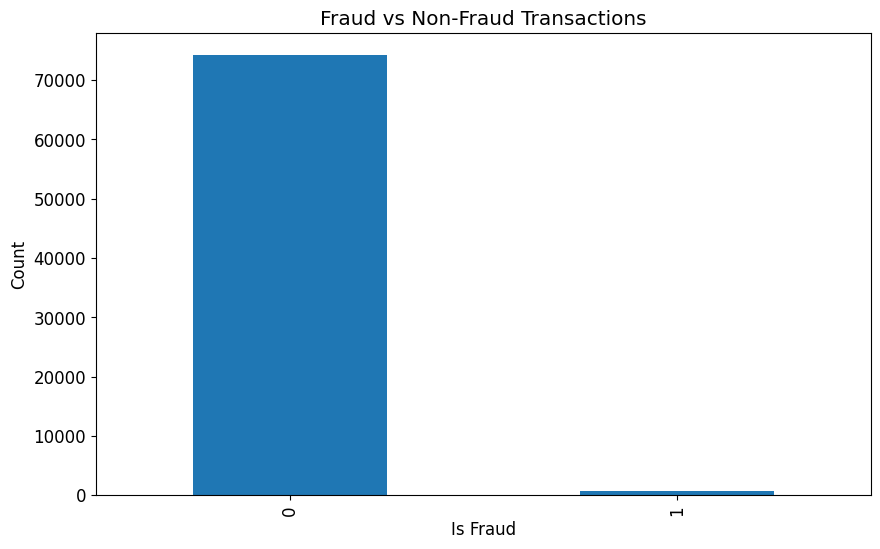

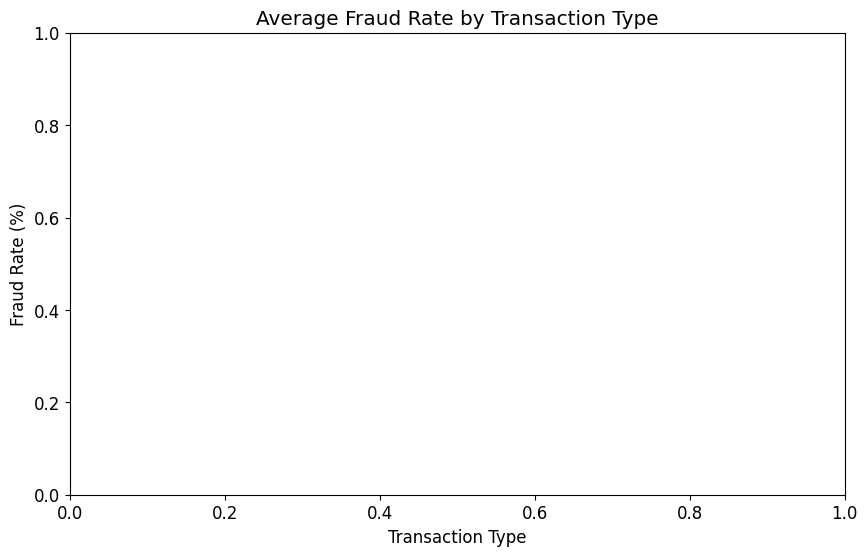

In [39]:
# Required Visualization 1: Fraud Distribution
# Create a chart showing the distribution of fraudulent vs non-fraudulent transactions
# Your code here
df_train['IsFraud'].value_counts().plot(kind='bar')
plt.title("Fraud vs Non-Fraud Transactions")
plt.xlabel("Is Fraud")
plt.ylabel("Count")
plt.show()

fraud_by_type = (
    df_train.groupby('TransactionType')['IsFraud'].mean().sort_values(ascending=False)
)
plt.title('Average Fraud Rate by Transaction Type')
plt.ylabel('Fraud Rate (%)')
plt.xlabel('Transaction Type')
plt.show()


In [21]:
# Required Visualization 2: Transaction Amount Analysis
# Create a box plot comparing transaction amounts
# Your code here


In [22]:
# Required Visualization 3: Correlation Heatmap
# Create a correlation heatmap for numeric features
# Your code here


In [23]:
# Choose two additional visualizations from the options provided
# Your code here


# Part 2: Data Preprocessing - 25 points

Prepare your data for modeling:

1. Handle missing values appropriately (5 points)
2. Convert categorical variables (10 points):
   - TransactionType
   - Location
   - Add any creative feature engineering (bonus)
3Split your data (5 points)

In [24]:
# Handle missing values
# Your code here


In [25]:
# Convert categorical variables
# Your code here


In [26]:
# split data
# Your code here


# Part 3: Model Building & Evaluation - 25 points

Build and evaluate your fraud detection model:

1. Train at least one model (Start with Logistic Regression) - 15 points
2. Create these visualizations:
   - ROC curve
   - Confusion matrix heatmap
   - Feature importance plot
3. Print classification report
4. Evaluate the model, look at the data precision and recall for fraud (1) are you getting good predictions? If not why? Make sure to fix before heading to next part

In [27]:
# Train your model(s)
# Your code here


In [28]:
# Create evaluation visualizations
# Your code here


# Part 4: Making Predictions - 25 points

1. Load and preprocess the test data
2. Make predictions
3. Save results in the correct format
4. Document your code

In [29]:
# Load and preprocess test data
# Your code here


In [30]:
# Make and save predictions
# Your code here


# Bonus Section (10 points)

Choose at least one:
1. Feature Engineering: Create meaningful new features
2. Model Comparison: Compare at least 3 different models
3. Advanced Visualization: Create an interactive dashboard using Plotly

In [31]:
# Bonus work
# Your code here
